In [12]:
import matplotlib.pyplot as plt
from jedi.inference.gradual.conversion import convert_values
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

cov_matrix = df.cov()
# cov_matrix

cov_pairs = []
n_features = len(df.columns)
for i in range(n_features):
    for j in range(i + 1, n_features):
        col1 = df.columns[i]
        col2 = df.columns[j]
        convert_values = cov_matrix.iloc[i, j]
        cov_pairs.append((col1, col2, convert_values))

cov_df = pd.DataFrame(cov_pairs, columns=['Feature1', 'Feature2', 'Covariance'])

cov_df_sorted_pos = cov_df.sort_values('Covariance', ascending=False)
print("pos:\n", cov_df_sorted_pos.head(3))
print("neg:\n", cov_df_sorted_pos.tail(3))
# cov_df_sorted_neg = cov_df.sort_values('Covariance', ascending=True)
# print("neg:", cov_df_sorted_neg.head())
df.corr()
df


pos:
    Feature1 Feature2  Covariance
30       s1       s2    0.002033
36       s2       s4    0.001496
42       s4       s5    0.001401
neg:
    Feature1 Feature2  Covariance
13      sex       s3   -0.000860
40       s3       s5   -0.000904
39       s3       s4   -0.001675


In [41]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
alcohol = df['alcohol'].copy()
magnesium = df['magnesium'].copy()
#cov
cov_matrix = np.cov(alcohol, magnesium)
#corr
correlation = np.corrcoef(alcohol, magnesium)
print(cov_matrix)
magnesium = magnesium * 20
cov_matrix = np.cov(alcohol, magnesium)[0, 1]

correlation = np.corrcoef(alcohol, magnesium)
print(cov_matrix)

[[  0.65906233   3.13987812]
 [  3.13987812 203.98933536]]
62.797562369072594


sigma 1 cov: 1.0269187553538313
sigma 1 corr: 0.9999999999999998
sigma 2 cov: 0.990365136527293
sigma 2 corr: 0.9999999999999999
sigma 3 cov: 1.0344451652137114
sigma 3 corr: 1.0


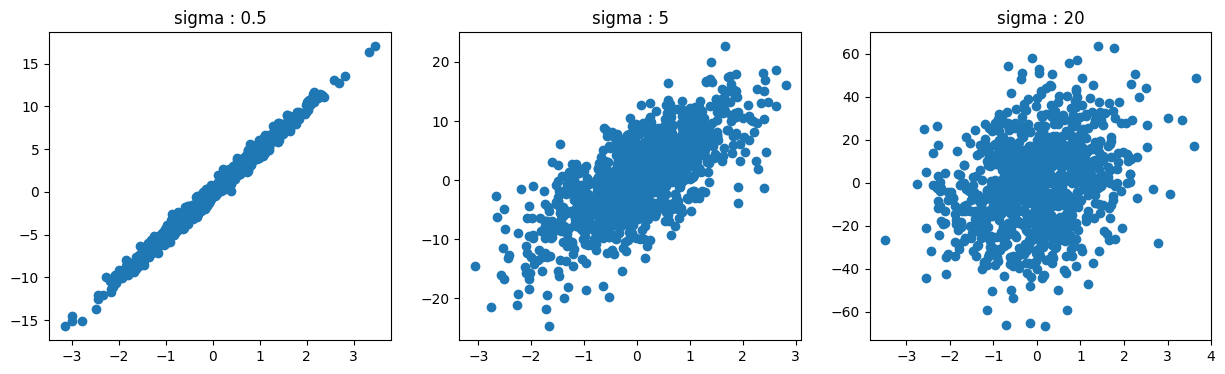

In [56]:
from pprint import pprint
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd


def simulation(sigma, n=1000):
    x = np.random.normal(0, 1, n)
    noise = np.random.normal(0, sigma, n)
    y = 5 * x + noise
    cov_ = np.cov(x, y, rowvar=False)
    cor_ = np.corrcoef(x, y, rowvar=False)
    return x, y, cov_, cor_


sigmas = [0.5, 5, 20]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
list_cov = []
list_corr = []
for index, sigma in enumerate(sigmas):
    x, y, cov, corr = simulation(sigma, n=1000)
    list_cov.append(cov)
    list_corr.append(corr)
    axes[index].scatter(x=x, y=y)
    axes[index].set_title(f"sigma : {sigma}")

print(f"sigma 1 cov: {np.array(list_cov)[0, 0, 0]}")
print(f"sigma 1 corr: {np.array(list_corr)[0, 0, 0]}")
print("=" * 20)

print(f"sigma 2 cov: {np.array(list_cov)[1, 0, 0]}")
print(f"sigma 2 corr: {np.array(list_corr)[1, 0, 0]}")
print("=" * 20)

print(f"sigma 3 cov: {np.array(list_cov)[2, 0, 0]}")
print(f"sigma 3 corr: {np.array(list_corr)[2, 0, 0]}")


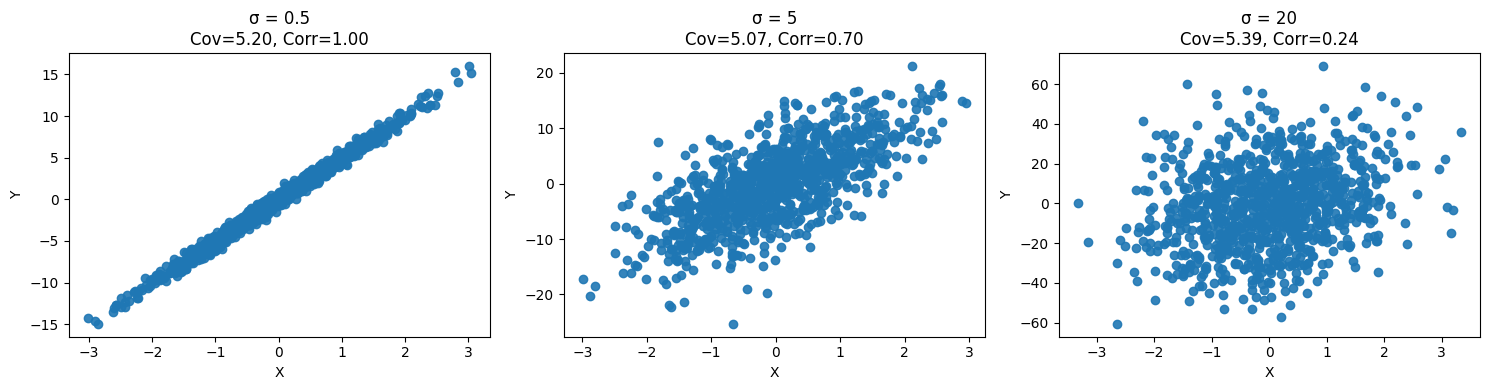

In [65]:
sigmas = [0.5, 5, 20]

plt.figure(figsize=(15, 4))

for i, sigma in enumerate(sigmas):
    X, Y, cov_xy, corr_xy = simulation(sigma)

    # Scatter plot
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, Y, alpha=0.9)
    plt.title(f"σ = {sigma}\nCov={cov_xy[0, 1]:.2f}, Corr={corr_xy[0, 1]:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")

plt.tight_layout()
plt.show()